<a href="https://colab.research.google.com/github/Valen-Nneji-007/pytorch-intro-/blob/main/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Computer Vision

### 0. Computer vision libraries in PyTorch

* `torchvision`
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvisison.models` - get pretrained computer vision models that you can leverage for your own problem
* `torchvision.tranforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Create a Python iterable over a dataset

In [ ]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualisation
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


### Getiing a dataset

The dataset we'll be using is FashionMNIST from torchvision datasets

In [ ]:
# Setup training data
from torchvision import datasets
train_data= datasets.FashionMNIST(
    root = "data", # where to download data to?
    train= True, # do we want the training datasets?
    download=True, # do we want to download yes/no?
    transform= torchvision.transforms.ToTensor(), # How do we wnat to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training exapmles
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"image shape: {image.shape} -> [Color_channel, width, height]")

print(f"image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28]) -> [Color_channel, width, height]
image label: Ankle boot


### 1.2 Visualising our Data

image shape: torch.Size([1, 28, 28])


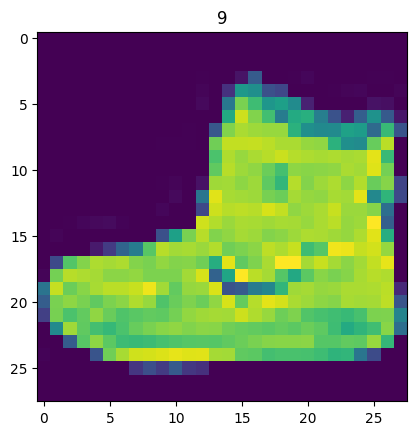

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
#image

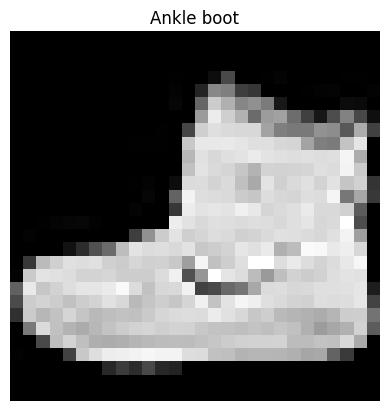

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

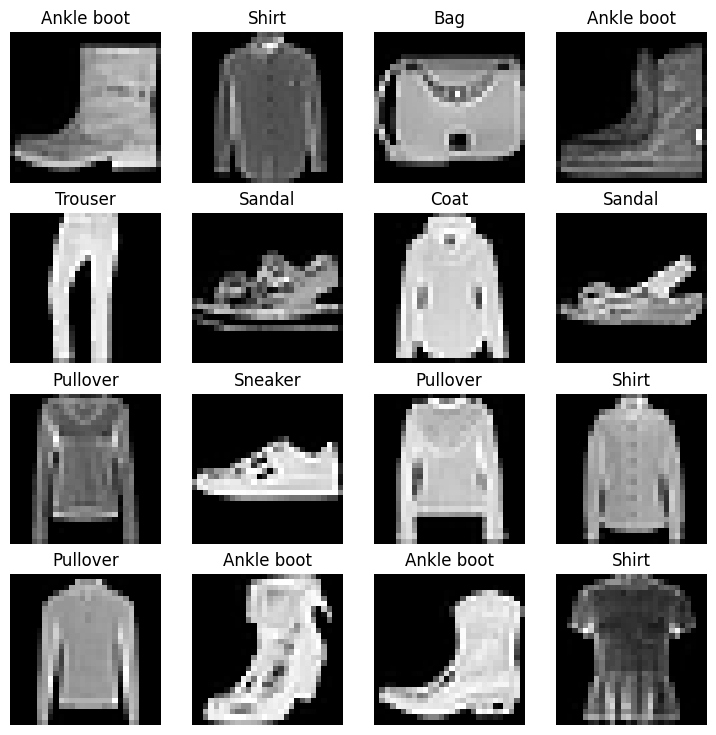

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label =  train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray" )
  plt.title(class_names[label])
  plt.axis(False);

Do you think these items of clothings(images) could be modelled with pure liner lines? Or do you think we will need non_linearities?

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

dataloader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini-batches).config/

why would we do this?

1. It is more computationally efficient, as in, your computer hardware may not be able to look ( store in memory)  at 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to updat its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE =32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle =True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e3c6253d1e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e3c6253ca90>)

In [ ]:
# Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e3c6253d1e0>, <torch.utils.data.dataloader.DataLoader object at 0x7e3c6253ca90>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches 32


In [ ]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch =next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


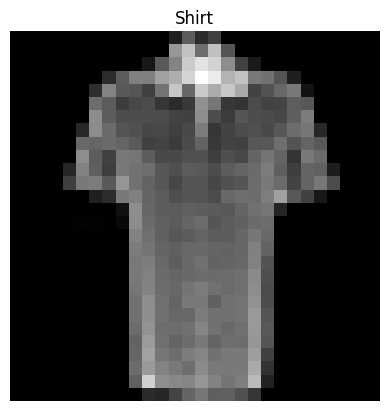

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);
print(f"image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a basline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

in other words, start simply and add complexity when necessary



In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]


#Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}")  #-> [colour_channel, width, height]
print(f"Shape after flattening: {output.shape}") # -> [colour_channel, width*height]





Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0=FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup a Loss function and Optimizer and evaluation metrices

* Loss_function  -  since we are working with multi-class data, our loss function will be `nn.CrossEntropy()`

* Optimizer -  Our optimizer `torch.optim.SGD()` (for stochastic Gradient Descent)

* Evaluation metric - since we are working on a classification problem, lets use accuaracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download....")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

#setup loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2 Creating a function to time our experiments

Machine Learning is very experimental

Two of the main things you will often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code....
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.724999999121792e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. loop through training batches, perform training steps, calcualte the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all (for fun)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the time
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs ( we will keep this small for faster training time)
epochs=3

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  ### Training
  train_loss = 0
  # Add a loop through thetraining batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accummulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    # Print out what is happening
  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)}samples.")

  # Divide total train loos by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss(accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true= y_test,
                              y_pred=test_pred.argmax(dim=1))

      # Calculate the test loss average per batch
      test_loss /=len(test_dataloader)

      # Calculate the test acc average per batch
      test_acc /= len(test_dataloader)

    # Print out what is happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f} ")

  # Calculate training time
  train_time_end_on_cpu = timer()
  total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                              end=train_time_end_on_cpu,
                                              device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----

Train loss: 0.5904 | Test loss: 0.0010, Test acc: 0.2803 
Train time on cpu: 14.268 seconds
Epoch: 1
----

Train loss: 0.4763 | Test loss: 0.0009, Test acc: 0.3003 
Train time on cpu: 26.809 seconds
Epoch: 2
----

Train loss: 0.4550 | Test loss: 0.0011, Test acc: 0.3003 
Train time on cpu: 40.283 seconds


### 4. Make predictions and get Model_0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Return a dictionary containing the results of model predicting  on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #make predictions
      y_pred =model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn( y_true= y,
                         y_pred= y_pred.argmax(dim=1))

      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

      return {"model_name": model.__class__.__name__, #only works when model was created
              "model_loss": loss.item(),
              "model_acc": acc}

# Calculate model 0 results on that dataset
model_0_results = eval_model(model=model_0,
                                 data_loader = test_dataloader,
                                 loss_fn = loss_fn,
                                 accuracy_fn = accuracy_fn)

model_0_results



{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0013715085806325078,
 'model_acc': 0.26956869009584666}

### 5. Setup device agnostic-code(for using a GPU if there is one)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Setuo device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-Linearity

We have lerned about the power of non-linearity previously

In [ ]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), #flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # Send to the GPU if it's available

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Create the Loss Function and the Optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 6.2 Functioning training and evaluation/testing loops

Lets create a function for:
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  """ Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()


  # Add a loop through thetraining batches
  for batch, (X, y) in enumerate(data_loader):
    #Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accummulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()



  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"TrainLoss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")





In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop steps on model going over data_Loader"""
  test_loss, test_acc= 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss: .5f}  | Test acc: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_1,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

  train_time_end_on_gpu = timer()
  total_train_time_model_1=print_train_time(start = train_time_start_on_gpu,
                                            end =train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
TrainLoss: 2.30166 | Train acc: 11.31%
Test loss:  2.30211  | Test acc: 10.75%

Train time on cpu: 13.055 seconds
Epoch: 1
-----
TrainLoss: 2.30166 | Train acc: 11.31%
Test loss:  2.30211  | Test acc: 10.75%

Train time on cpu: 26.111 seconds
Epoch: 2
-----
TrainLoss: 2.30166 | Train acc: 11.31%
Test loss:  2.30211  | Test acc: 10.75%

Train time on cpu: 39.120 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model train faster on CPU than GPU.
>
> Why is this?
>
>1. it could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
>2. The hardware you're using has a better CPU in terms compute capability than the GPU.


In [ ]:
# Train time on CPU
total_train_time_model_0

40.282843469

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Return a dictionary containing the results of model predicting  on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      #make predictions
      y_pred =model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn( y_true= y,
                         y_pred= y_pred.argmax(dim=1))

      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

      return {"model_name": model.__class__.__name__, #only works when model was created
              "model_loss": loss.item(),
              "model_acc": acc}






In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.0072987861931324005,
 'model_acc': 0.039936102236421724}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0013715085806325078,
 'model_acc': 0.26956869009584666}

## Model 2: Building a Convolutional Neural Network(CNN)
CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the tinyVGG
  Model from CNN explainer website.
  """
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there is a trick to calculate this
                  out_features=output_shape)

    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2:{x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
rand_image_tensor =torch.randn(size= (1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

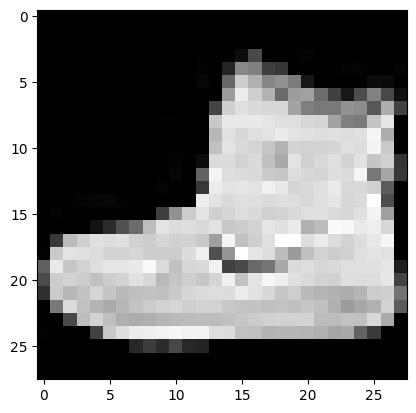

In [ ]:
plt.imshow(image.squeeze(), cmap="gray");

## 7.1 Stepping through `nn.Conv2d`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image Batch Shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image Batch Shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data trough the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

## 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out the original image shape without unsqueeze dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueeze dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layers
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor: \n{random_tensor}")
print(f"Random tensor sahpe: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer =  nn.MaxPool2d(kernel_size=2)

# Pass the ranndom tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor sahpe: torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs =3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn =  accuracy_fn,
             device = device)
  test_step(model=model_2,
            data_loader = test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end=train_time_end_model_2,
                                              device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
TrainLoss: 0.59518 | Train acc: 78.38%
Test loss:  0.39500  | Test acc: 85.99%

Train time on cpu: 58.661 seconds
Epoch: 1
-----
TrainLoss: 0.36536 | Train acc: 86.90%
Test loss:  0.35244  | Test acc: 86.91%

Train time on cpu: 118.214 seconds
Epoch: 2
-----
TrainLoss: 0.32588 | Train acc: 88.13%
Test loss:  0.32719  | Test acc: 88.07%

Train time on cpu: 176.244 seconds


In [ ]:
# Get model_2 results
model_2_results =eval_model(model=model_2,
                            data_loader =test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn= accuracy_fn,
                            device =device)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0015445949975401163,
 'model_acc': 0.2795527156549521}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.001372,0.269569
1,FashionMNISTModelV1,0.007299,0.039936
2,FashionMNISTModelV2,0.001545,0.279553


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.001372,0.269569,40.282843
1,FashionMNISTModelV1,0.007299,0.039936,39.120378
2,FashionMNISTModelV2,0.001545,0.279553,176.244118


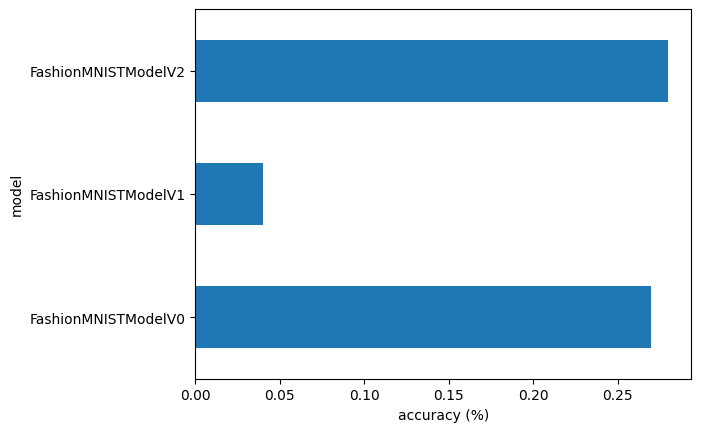

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### 9. Make and Evaluate random predictions with best model

In [ ]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device =device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # STack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

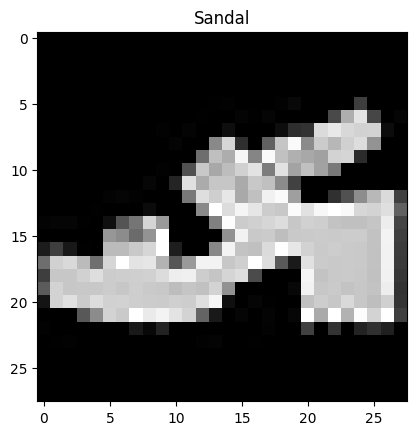

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_prediction(model=model_2,
                             data= test_samples)

# view first two prediction probabilities
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [ ]:
# COnvert prediction probablilties to labels
pred_classes =pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

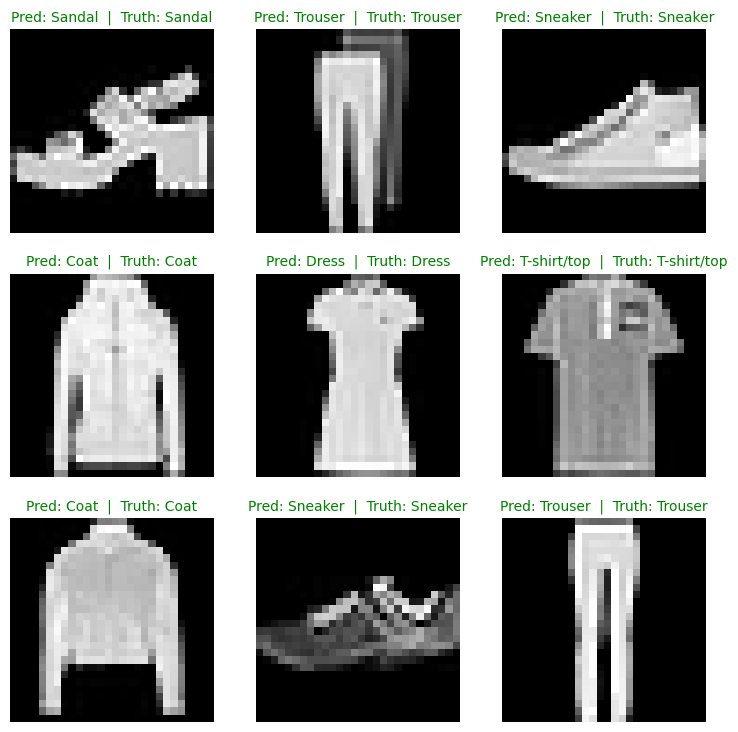

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find theprediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the Truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label}  |  Truth: {truth_label}"

  # Check for equality between pred and truth and change colour of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

# 10.  Making a Confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually

1. Make predictions with our trained model on the test dataset

2. Make a confusion matrix `torchmetrics.ConfusionMatrix`

3. Plot the confusion Matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions...."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit =model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediciton on CPU for evaluation
    y_preds.append(y_pred.cpu())

  # Concatenate list of prediction into a tensor
  print(y_preds)
  y_pred_tensor =torch.cat(y_preds)
  y_pred_tensor[:1]


Making Predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 9, 7, 5,
        1, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([8, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 6, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 6, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        6, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 2,
       

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# see if required packages are installed and if not, install them..
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "Mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.2 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.22.0'

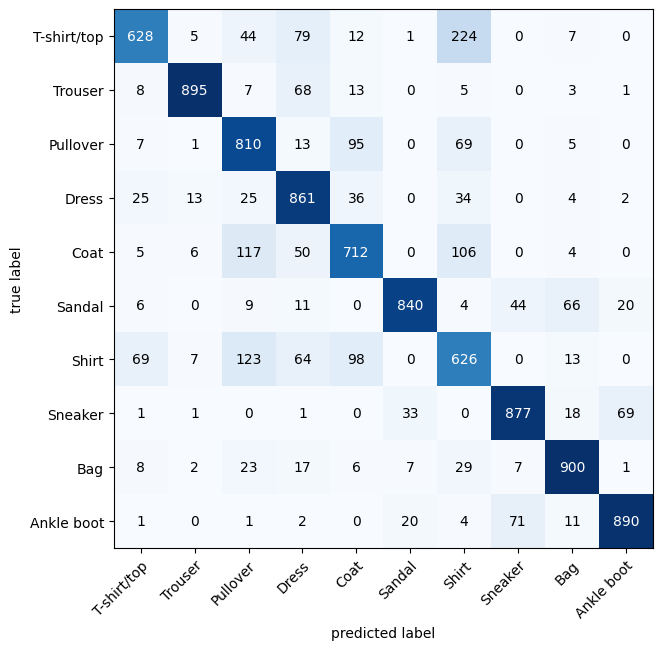

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
task_type = "multiclass"

# 2. Setup confusion instance and compare predictions to tragets
confmat = ConfusionMatrix(task=task_type,num_classes=len(class_names))
confmat_tensor =confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and Load best performing model


In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape =1,
                                   hidden_units =10,
                                   output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0015445949975401163,
 'model_acc': 0.2795527156549521}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              )

tensor(True)